In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from google.colab import drive


drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

data.head()

Mounted at /content/drive


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
            'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']

data[features] = data[features].fillna(data[features].mean())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])


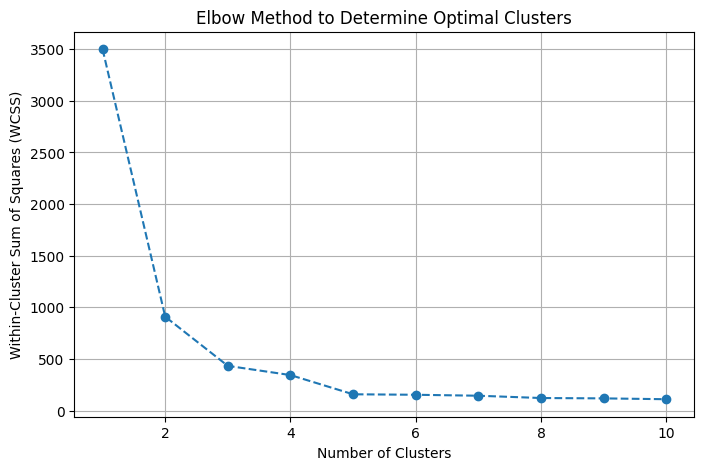

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_analysis = data.groupby('Cluster')[features].mean()
print("Cluster Analysis Summary:")
print(cluster_analysis)


Cluster Analysis Summary:
         App Usage Time (min/day)  Screen On Time (hours/day)  \
Cluster                                                         
0                      540.686131                   10.098540   
1                      138.082803                    3.142675   
2                      318.665428                    5.981413   
3                       60.700730                    1.496350   

         Battery Drain (mAh/day)  Number of Apps Installed  \
Cluster                                                      
0                    2698.321168                 89.167883   
1                     924.649682                 31.840764   
2                    1822.624535                 60.438662   
3                     456.094891                 14.627737   

         Data Usage (MB/day)  
Cluster                       
0                1971.138686  
1                 472.968153  
2                1035.717472  
3                 203.722628  


<Figure size 1200x600 with 0 Axes>

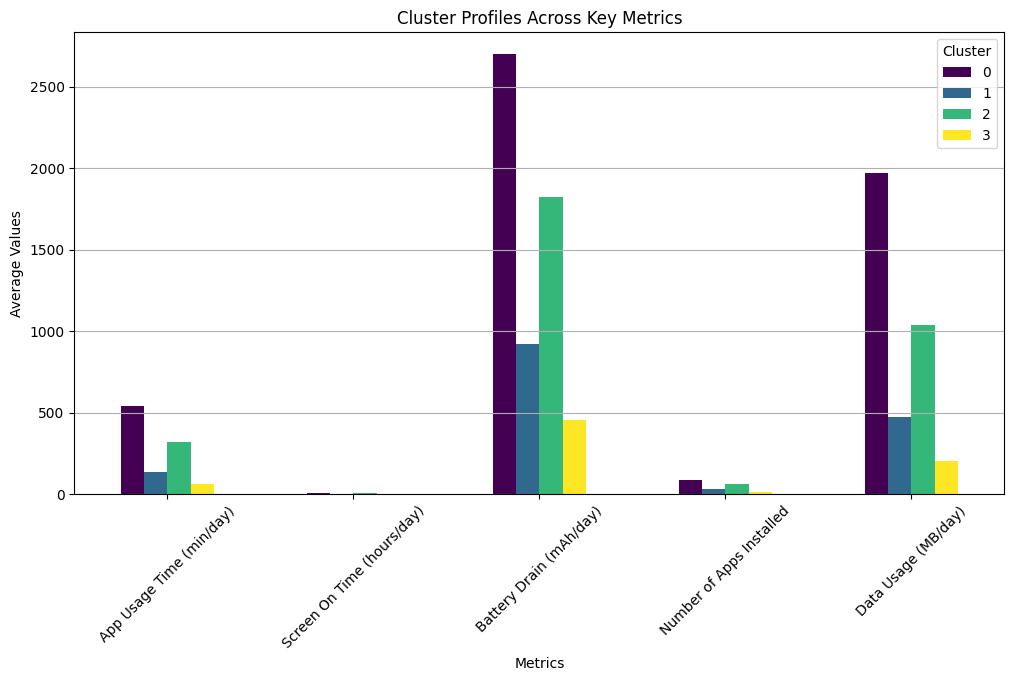

In [ ]:
plt.figure(figsize=(12, 6))
cluster_analysis.T.plot(kind='bar', figsize=(12, 6), colormap='viridis', legend=True)
plt.title('Cluster Profiles Across Key Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


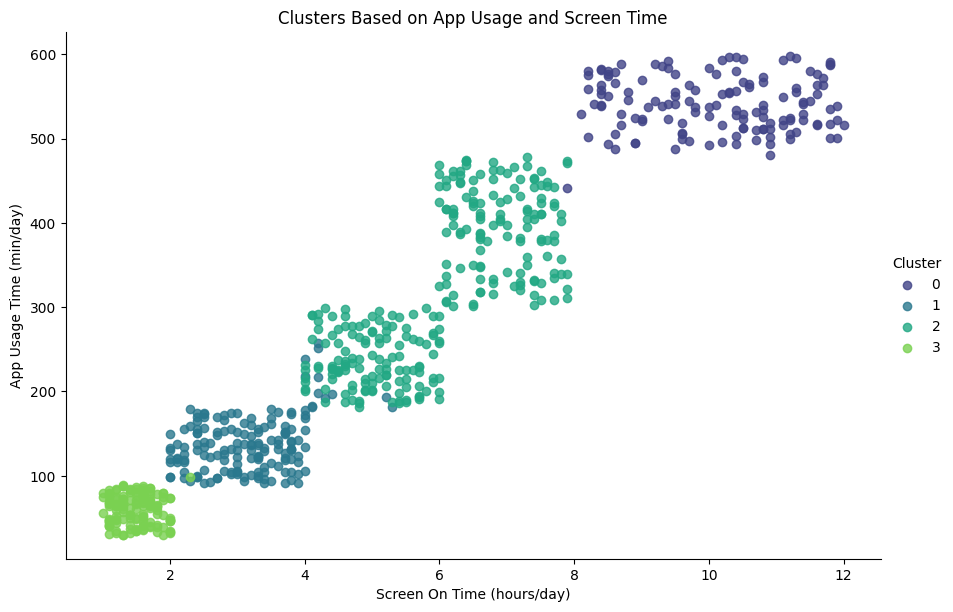

In [ ]:
sns.lmplot(x='Screen On Time (hours/day)', y='App Usage Time (min/day)',
           hue='Cluster', data=data, palette='viridis', fit_reg=False, height=6, aspect=1.5)
plt.title('Clusters Based on App Usage and Screen Time')
plt.show()


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Number of Apps Installed': 'mean',
    'Data Usage (MB/day)': 'mean'
})

print("Cluster Summary with Age and Gender Distribution:")
print(cluster_summary)


Cluster Summary with Age and Gender Distribution:
               Age                                                     Gender  \
              mean min max                                           <lambda>   
Cluster                                                                         
0        38.065693  18  59  {'Male': 0.5547445255474452, 'Female': 0.44525...   
1        38.414013  18  59  {'Male': 0.535031847133758, 'Female': 0.464968...   
2        38.806691  18  59  {'Female': 0.516728624535316, 'Male': 0.483271...   
3        38.343066  18  59  {'Male': 0.5401459854014599, 'Female': 0.45985...   

        App Usage Time (min/day) Screen On Time (hours/day)  \
                            mean                       mean   
Cluster                                                       
0                     540.686131                  10.098540   
1                     138.082803                   3.142675   
2                     318.665428                   5.981413   
3   

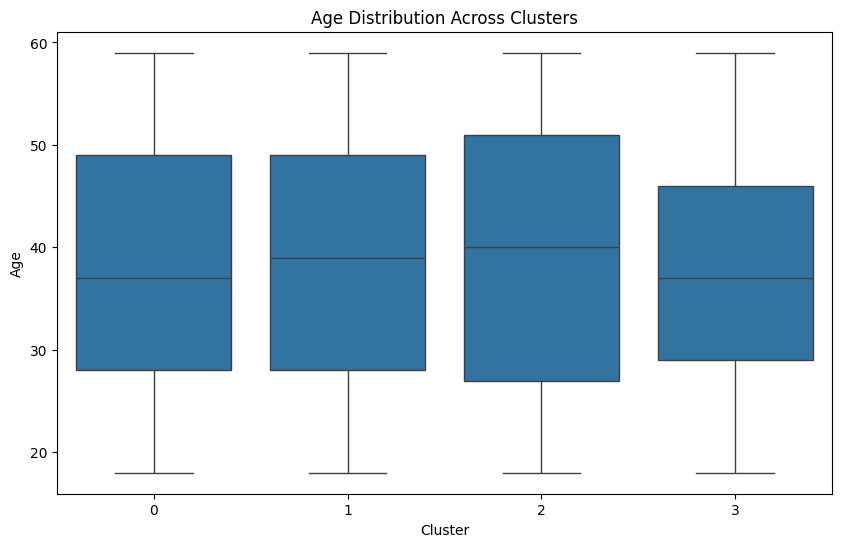

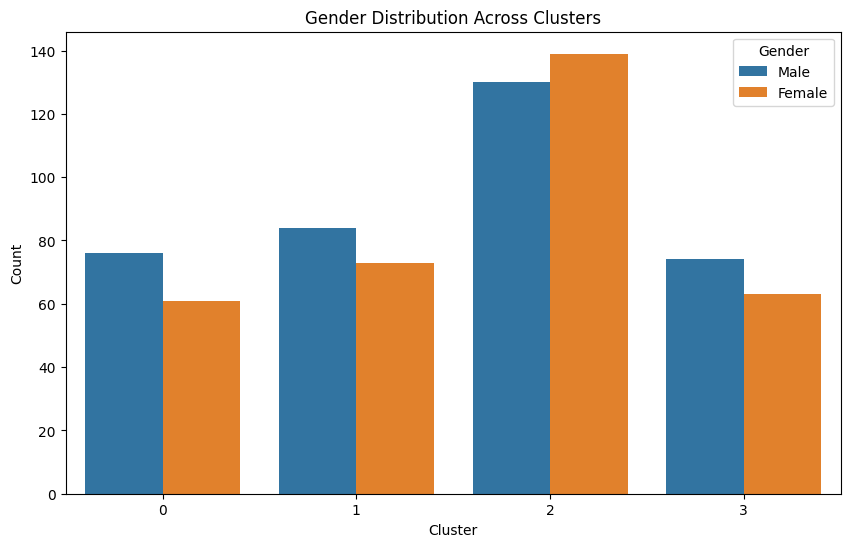

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=data)
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
